# Ercot Figures & Graphs


## Data

### Load in Data


In [95]:
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

# Set file path to Ercot Data
file_path = r"/Users/YoungFreeesh/Visual Studio Code/_Python/Web Scraping/Ercot/MASTER-Ercot.xlsx"

# read all data from "Master Data" tab from "MASTER-Ercot" 
dfMASTER = pd.read_excel(file_path, sheet_name = 'Master Data')

# Convert df to a Date Frame
dfMASTER = pd.DataFrame(dfMASTER) 

# Get Headers of "Master Data"
headers = list(dfMASTER.columns.values) 

# Get Unique Months by creating an Array of the active worksheet names
xls = xlrd.open_workbook(file_path, on_demand=True)
SheetNameArray = xls.sheet_names()
UniqueMonths = SheetNameArray[3:]

### Create DataFrames


In [96]:
# Initialize dataframeCollection
dataframeCollection = {} 

#for monthNum in range(len(UniqueMonths)):
for month in UniqueMonths:
    print(month) # print out each month in the data set
    dfTEMP = pd.read_excel(file_path, sheet_name = month)
    dataframeCollection[month] = pd.DataFrame(dfTEMP) 
    

01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
07-2018


### Summary of Data


##### Summary - All Ercot Data

In [97]:
dfMASTER.describe()

,Interval Ending,HB_BUSAVG,HB_HOUSTON,HB_HUBAVG,HB_NORTH,HB_SOUTH,HB_WEST,LZ_AEN,LZ_CPS,LZ_HOUSTON,LZ_LCRA,LZ_NORTH,LZ_RAYBN,LZ_SOUTH,LZ_WEST
count,19008.000000,5664.000000,5664.000000,5664.000000,5664.000000,19008.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,19008.000000,5664.00000
mean,1197.500000,29.281294,29.757708,29.215074,29.280312,27.035312,28.320489,29.524048,29.620900,30.754740,29.626121,29.810629,29.619280,31.917445,59.98973
std,692.981371,71.797077,71.609044,71.792759,71.904941,77.592385,72.254052,71.558889,71.483096,72.541356,71.527297,72.007284,72.479794,100.691177,79.97047
min,15.000000,0.250000,0.460000,0.270000,0.100000,-86.690000,-4.240000,0.500000,0.930000,0.470000,0.530000,0.080000,0.060000,-23.730000,-1.49000
25%,611.250000,18.690000,18.940000,18.660000,18.530000,17.920000,17.630000,19.080000,19.450000,18.947500,19.160000,18.520000,18.450000,18.200000,24.91750
50%,1207.500000,22.335000,22.730000,22.280000,22.300000,19.820000,21.310000,22.635000,22.760000,22.780000,22.680000,22.465000,22.235000,20.130000,44.66000
75%,1803.750000,29.500000,29.965000,29.442500,29.552500,25.450000,28.960000,29.717500,29.612500,30.160000,29.792500,30.262500,29.390000,26.640000,87.38000
max,2400.000000,3124.100000,3120.140000,3125.350000,3125.200000,5772.880000,3140.590000,3117.390000,3113.550000,3120.050000,3116.340000,3125.430000,3125.910000,5512.210000,3237.12000


#### Summary - HB_SOUTH Prices

In [98]:
dfMASTER['HB_SOUTH'].describe()

count    19008.000000
mean        27.035312
std         77.592385
min        -86.690000
25%         17.920000
50%         19.820000
75%         25.450000
max       5772.880000
Name: HB_SOUTH, dtype: float64

#### Summary - LZ_SOUTH Prices

In [99]:
dfMASTER['LZ_SOUTH'].describe()

count    19008.000000
mean        31.917445
std        100.691177
min        -23.730000
25%         18.200000
50%         20.130000
75%         26.640000
max       5512.210000
Name: LZ_SOUTH, dtype: float64

## Outliers

### Calculate Outliers - 2.3 SD

In [100]:
### Outlier: Based on Percentile
outlierPercentile = .99 # Note: this is arbitrary and can be set to anything
# outlier_HB_SOUTH = dfMASTER['HB_SOUTH'].quantile(outlierPercentile)
# outlier_LZ_SOUTH = dfMASTER['LZ_SOUTH'].quantile(outlierPercentile)

### Outlier: Based on std
sdtMultiplier = 2.3
outlier_HB_SOUTH = dfMASTER['HB_SOUTH'].std() * sdtMultiplier
outlier_LZ_SOUTH = dfMASTER['LZ_SOUTH'].std() * sdtMultiplier

print("HB_SOUTH Outlier: ", int(outlier_HB_SOUTH), "($/MWh)") # rounded down
print("LZ_SOUTH Outlier: ", int(outlier_LZ_SOUTH), "($/MWh)") # ronded down


HB_SOUTH Outlier:  178 ($/MWh)
LZ_SOUTH Outlier:  231 ($/MWh)


### Dataframe Manipulations:  Outlier Trend & Weekend Analysis

In [101]:
### Get Outliers


### HB_SOUTH ###############################################################################################
############################################################################################################
############################################################################################################
dfMASTER_HB_SOUTH = dfMASTER[['Oper Day', 'Interval Ending', 'HB_SOUTH']].copy(deep=True)
dfMASTER_HB_SOUTH = dfMASTER_HB_SOUTH[dfMASTER_HB_SOUTH['HB_SOUTH'] >= outlier_HB_SOUTH]

# Weekend Outlier Analysis - HB_SOUTH
############################################################################################################
dfMASTER_HB_SOUTH['Oper Day'] = pd.to_datetime(dfMASTER_HB_SOUTH['Oper Day'])
dfMASTER_HB_SOUTH['day_of_week'] = dfMASTER_HB_SOUTH['Oper Day'].dt.dayofweek
dfMASTER_HB_SOUTH['weekday_name'] = dfMASTER_HB_SOUTH['Oper Day'].dt.weekday_name

WeekendDF_HB_SOUTH = dfMASTER_HB_SOUTH.copy(deep=True) # Copy --> don't mess with original
WeekendDF_HB_SOUTH['day_of_week'] = WeekendDF_HB_SOUTH['Oper Day'].dt.dayofweek

weekendOutliers_HB_SOUTH = WeekendDF_HB_SOUTH[WeekendDF_HB_SOUTH['day_of_week'] >= 5 ].count()[0] # Get first 
totalOutliers_HB_SOUTH = WeekendDF_HB_SOUTH['day_of_week'].count()
print('HB_SOUTH Weekend Outliers: ', weekendOutliers_HB_SOUTH)
print('HB_SOUTH Total Outliers: ', totalOutliers_HB_SOUTH)
print('HB_SOUTH Weekend Outliers Percentage: ', (weekendOutliers_HB_SOUTH / totalOutliers_HB_SOUTH) * 100, '%\n')

# HB_SOUTH
############################################################################################################
dfMASTER_HB_SOUTH.rename(columns={'HB_SOUTH': 'Prices'}, inplace=True)
dfMASTER_HB_SOUTH['Trending'] = False



### LZ_SOUTH ###############################################################################################
############################################################################################################
############################################################################################################

dfMASTER_LZ_SOUTH = dfMASTER[['Oper Day', 'Interval Ending', 'LZ_SOUTH']].copy(deep=True)
dfMASTER_LZ_SOUTH_COPY = dfMASTER_LZ_SOUTH.copy(deep=True)
dfMASTER_LZ_SOUTH = dfMASTER_LZ_SOUTH[dfMASTER_LZ_SOUTH['LZ_SOUTH'] >= outlier_LZ_SOUTH]

# Weekend Outlier Analysis - LZ_SOUTH
############################################################################################################
dfMASTER_LZ_SOUTH['Oper Day'] = pd.to_datetime(dfMASTER_LZ_SOUTH['Oper Day'])

dfMASTER_LZ_SOUTH['day_of_week'] = dfMASTER_LZ_SOUTH['Oper Day'].dt.dayofweek
dfMASTER_LZ_SOUTH['weekday_name'] = dfMASTER_LZ_SOUTH['Oper Day'].dt.weekday_name

WeekendDF_LZ_SOUTH = dfMASTER_LZ_SOUTH.copy(deep=True) # Copy --> don't mess with original
WeekendDF_LZ_SOUTH['day_of_week'] = WeekendDF_LZ_SOUTH['Oper Day'].dt.dayofweek

weekendOutliers_LZ_SOUTH = WeekendDF_LZ_SOUTH[WeekendDF_LZ_SOUTH['day_of_week'] >= 5 ].count()[0] # Get first 
totalOutliers_LZ_SOUTH = WeekendDF_LZ_SOUTH['day_of_week'].count()
print('LZ_SOUTH Weekend Outliers: ', weekendOutliers_LZ_SOUTH)
print('LZ_SOUTH Total Outliers: ', totalOutliers_LZ_SOUTH)
print('LZ_SOUTH Weekend Outliers Percentage: ', (weekendOutliers_LZ_SOUTH / totalOutliers_LZ_SOUTH) * 100, '%\n')

# LZ_SOUTH
############################################################################################################
############################################################################################################
dfMASTER_LZ_SOUTH.rename(columns={'LZ_SOUTH': 'Prices'}, inplace=True)
dfMASTER_LZ_SOUTH['Trending'] = False



### Restore dataframe indices
############################################################################################################
############################################################################################################
QQ1 = dfMASTER_HB_SOUTH.index
dfMASTER_HB_SOUTH['Indices'] = QQ1
dfMASTER_HB_SOUTH = dfMASTER_HB_SOUTH.reset_index(drop=True)

QQ2 = dfMASTER_LZ_SOUTH.index
dfMASTER_LZ_SOUTH['Indices'] = QQ2
dfMASTER_LZ_SOUTH = dfMASTER_LZ_SOUTH.reset_index(drop=True)


############################################################################################################
############################################################################################################

#outlierLevel_60 = WeekendDF_LZ_SOUTH['LZ_SOUTH'].quantile(.40)
#tempDF = WeekendDF_LZ_SOUTH[WeekendDF_LZ_SOUTH['LZ_SOUTH'] <= outlierLevel_60].copy(deep=True)

#tempDF
#tempDF2 = tempDF.resample(rule='15Min', on='datetime').mean()
#tempDF2
#percentileOutilers_LZ_SOUTH = temp['LZ_SOUTH']

# 100% of the weekends
# tim3 > 4:30 weekdays

#dfMASTER_LZ_SOUTH
#tempDF = WeekendDF_LZ_SOUTH[(WeekendDF_LZ_SOUTH['Interval Ending'] >= 1630) and (WeekendDF_LZ_SOUTH['weekday_name'] != 'Saturday')].copy(deep=True)
#tempDF = dfMASTER_LZ_SOUTH[(dfMASTER_LZ_SOUTH['Interval Ending'] >= 1630) & (dfMASTER_LZ_SOUTH['weekday_name'] != 'Saturday') & (dfMASTER_LZ_SOUTH['weekday_name'] != 'Sunday')].copy(deep=True)
# meanOutlierPrice_Weekdays_TimeofDay_Restricted = tempDF['LZ_SOUTH'].mean()
# print('meanOutlierPrice_Weekdays_TimeofDay_Restricted: ', meanOutlierPrice_Weekdays_TimeofDay_Restricted)
# tempDF
#dfMASTER_LZ_SOUTH
#WeekendDF_LZ_SOUTH
#WeekendDF_LZ_SOUTH.dtypes

############################################################################################################
############################################################################################################

### Average LZ_SOUTH Price: (4:30 and after M-F | midnight to midnight Sat+Sun)

#dfMASTER_LZ_SOUTH_COPY
dfMASTER_LZ_SOUTH_COPY['Oper Day'] = pd.to_datetime(dfMASTER_LZ_SOUTH_COPY['Oper Day'])
dfMASTER_LZ_SOUTH_COPY['day_of_week'] = dfMASTER_LZ_SOUTH_COPY['Oper Day'].dt.dayofweek
dfMASTER_LZ_SOUTH_COPY['weekday_name'] = dfMASTER_LZ_SOUTH_COPY['Oper Day'].dt.weekday_name
#dfMASTER_LZ_SOUTH_COPY

#tempDF = dfMASTER_LZ_SOUTH[(dfMASTER_LZ_SOUTH['Interval Ending'] >= 1630) & (dfMASTER_LZ_SOUTH['weekday_name'] != 'Saturday') & (dfMASTER_LZ_SOUTH['weekday_name'] != 'Sunday')].copy(deep=True)

### Logic:  >=4:30PM M-F
#(dfMASTER_LZ_SOUTH['Interval Ending'] >= 1630) & (dfMASTER_LZ_SOUTH['weekday_name'] != 'Saturday') & (dfMASTER_LZ_SOUTH['weekday_name'] != 'Sunday')
tempDF_M_F = dfMASTER_LZ_SOUTH_COPY[(dfMASTER_LZ_SOUTH_COPY['Interval Ending'] >= 1630) & (dfMASTER_LZ_SOUTH_COPY['weekday_name'] != 'Saturday') & (dfMASTER_LZ_SOUTH_COPY['weekday_name'] != 'Sunday')].copy(deep=True)
#tempDF_M_F
### Logic: All times Sat-Sun
#(dfMASTER_LZ_SOUTH['weekday_name'] == 'Saturday') | (dfMASTER_LZ_SOUTH['weekday_name'] == 'Sunday')
tempDF_Weekend = dfMASTER_LZ_SOUTH_COPY[(dfMASTER_LZ_SOUTH_COPY['weekday_name'] == 'Saturday') | (dfMASTER_LZ_SOUTH_COPY['weekday_name'] == 'Sunday')].copy(deep=True)
#tempDF_Weekend

tempDF_Combined = dfMASTER_LZ_SOUTH_COPY[((dfMASTER_LZ_SOUTH_COPY['Interval Ending'] >= 1630) & (dfMASTER_LZ_SOUTH_COPY['weekday_name'] != 'Saturday') & (dfMASTER_LZ_SOUTH_COPY['weekday_name'] != 'Sunday')) | ((dfMASTER_LZ_SOUTH_COPY['weekday_name'] == 'Saturday') | (dfMASTER_LZ_SOUTH_COPY['weekday_name'] == 'Sunday')) ].copy(deep=True)     
#tempDF_Combined
meanPrice_AllWeekends_WeekdaysTimeRestricted = tempDF_Combined['LZ_SOUTH'].mean()
print('meanPrice_AllWeekends_WeekdaysTimeRestricted: ', meanPrice_AllWeekends_WeekdaysTimeRestricted)

#print('\n', tempDF_Combined['weekday_name'].unique()) # Sanity check, all days included
#tempDF_Combined


### Average LZ_SOUTH Price: (4:30 and after M-F | midnight to midnight Sat+Sun)
#dfMASTER_LZ_SOUTH_COPY
#tempDF2 = dfMASTER_LZ_SOUTH_COPY[dfMASTER_LZ_SOUTH_COPY['Oper Day'] < ]

#dfMASTER_LZ_SOUTH_COPY[dfMASTER_LZ_SOUTH_COPY['Oper Day'] <= 2018-05-31]
#dfMASTER_LZ_SOUTH_COPY['Oper Day'].month
#dfMASTER_LZ_SOUTH_COPY['date'] = pd.to_datetime(dfMASTER_LZ_SOUTH_COPY['Oper Day'])
#dfMASTER_LZ_SOUTH_COPY
#kk = pd.to_datetime('2018-01-01')
#mask = (dfMASTER_LZ_SOUTH_COPY['date'] > pd.to_datetime('2018-01-01')) & (dfMASTER_LZ_SOUTH_COPY['date'] <= pd.to_datetime('2018-05-01'))
#mask = (dfMASTER_LZ_SOUTH_COPY['date'] > '2018-01-01') & (dfMASTER_LZ_SOUTH_COPY['date'] <= '2018-05-01')

mask = dfMASTER_LZ_SOUTH_COPY[dfMASTER_LZ_SOUTH_COPY['Oper Day'] <= "2018-05-31"]
meanPrice_Jan_thru_Aug = mask['LZ_SOUTH'].mean()
print('meanPrice_Jan_thru_Aug: ', meanPrice_Jan_thru_Aug)



HB_SOUTH Weekend Outliers:  25
HB_SOUTH Total Outliers:  142
HB_SOUTH Weekend Outliers Percentage:  17.6056338028 %

LZ_SOUTH Weekend Outliers:  40
LZ_SOUTH Total Outliers:  198
LZ_SOUTH Weekend Outliers Percentage:  20.202020202 %

meanPrice_AllWeekends_WeekdaysTimeRestricted:  32.87310186132129
meanPrice_Jan_thru_Aug:  32.73862099889617


## Trends

### Methods: Outlier Trend  & Length of Trend 

In [102]:
### OutlierTrend
# def OutlierTrend(outArr):
#     for i in range(1,len(outArr['Prices'])):
#         if outArr['Indices'][i] == (outArr['Indices'][i-1] + 1):
#             outArr['Trending'][i] = True 
#     return outArr

def OutlierTrend(outArr):
    tempTrendingArr = [False]
    for i in range(1,len(outArr['Prices'])):
        
        if outArr['Indices'][i] == (outArr['Indices'][i-1] + 1):
            tempTrendingArr.append(True) 
        else:
            tempTrendingArr.append(False) 
            
    tempTrendingArr = np.asarray(tempTrendingArr) # Convert from list to array
    outArr['Trending'] = tempTrendingArr
    return outArr
            
# Call OutlierTrend() with South data 
dfMASTER_HB_SOUTH = OutlierTrend(dfMASTER_HB_SOUTH)
dfMASTER_LZ_SOUTH = OutlierTrend(dfMASTER_LZ_SOUTH)



### LengthOfTrend
def LengthOfTrend(outArr):
    tempCount = 0
    lengthArr = []
    for i in range(1,len(outArr['Prices'])):
        if outArr['Indices'][i] == (outArr['Indices'][i-1] + 1):
            tempCount = tempCount + 1
        else:
            #print(tempCount)
            lengthArr.append(tempCount) # trend done --> add to array
            tempCount = 0 # reset tempcount
            
    #print('Length of Trend Array: ', lengthArr)
    return lengthArr


## Calculations & Savings

In [103]:
### Note that these ar Naive calculations meant to represent the best possible situations (hence, not realistic)


### HB_SOUTH
############################################################################################################
############################################################################################################
print('HB_SOUTH: ')
### Calculate Cumulative Spend
print('\t Cumulative Spend: ',dfMASTER['HB_SOUTH'].sum())

### Calculate Outlier Spend
print('\t Cumulative Outlier Spend: ', dfMASTER_HB_SOUTH['Prices'].sum())

### Calculate Upperbound on Savings
print('\t Savings Upper Bound: ', dfMASTER_HB_SOUTH[dfMASTER_HB_SOUTH['Trending'] == True]['Prices'].sum())

### Min Outlier Spend
print('\t Outlier Spend after Savings: ', dfMASTER_HB_SOUTH['Prices'].sum() - dfMASTER_HB_SOUTH[dfMASTER_HB_SOUTH['Trending'] == True]['Prices'].sum())

### Savings %
print('\t Savings: ', int(100 * (dfMASTER_HB_SOUTH[dfMASTER_HB_SOUTH['Trending'] == True]['Prices'].sum() / dfMASTER_HB_SOUTH['Prices'].sum())), '%')

### Length of Trends
print('\t Mean Trend Length', np.mean(LengthOfTrend(dfMASTER_HB_SOUTH)))
print('\n \t Trend Length Array: ', LengthOfTrend(dfMASTER_HB_SOUTH))
print('\n\n\n')



### LZ_SOUTH
############################################################################################################
############################################################################################################
print('LZ_SOUTH: ')
### Calculate Cumulative Spend
print('\t Cumulative Spend: ',dfMASTER['LZ_SOUTH'].sum())

### Calculate Outlier Spend
print('\t Cumulative Outlier Spend: ', dfMASTER_LZ_SOUTH['Prices'].sum())

### Calculate Upperbound on Savings
print('\t Savings Upper Bound: ', dfMASTER_LZ_SOUTH[dfMASTER_LZ_SOUTH['Trending'] == True]['Prices'].sum())

### Min Outlier Spend
print('\t Outlier Spend after Savings: ', dfMASTER_LZ_SOUTH['Prices'].sum() - dfMASTER_LZ_SOUTH[dfMASTER_LZ_SOUTH['Trending'] == True]['Prices'].sum())

### Savings %
print('\t Savings: ', int(100 * (dfMASTER_LZ_SOUTH[dfMASTER_LZ_SOUTH['Trending'] == True]['Prices'].sum() / dfMASTER_LZ_SOUTH['Prices'].sum())), '%')

### Length of Trends
print('\t Mean Trend Length', np.mean(LengthOfTrend(dfMASTER_LZ_SOUTH)))
print('\n \t Trend Length Array: ', LengthOfTrend(dfMASTER_LZ_SOUTH))
print('\n\n\n')
print('Note: Mean Trend Length is now a lot lower than 12.  \n \t This is because we are now using more extreme outliers than before.')
print('\n\n')


HB_SOUTH: 
	 Cumulative Spend:  513887.22
	 Cumulative Outlier Spend:  82518.68
	 Savings Upper Bound:  63345.29
	 Outlier Spend after Savings:  19173.39
	 Savings:  76 %
	 Mean Trend Length 1.43103448276

 	 Trend Length Array:  [0, 0, 18, 7, 1, 0, 0, 7, 0, 0, 0, 2, 3, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 5, 0, 8, 0, 2, 0, 5, 0, 3, 0, 11]




LZ_SOUTH: 
	 Cumulative Spend:  606686.79
	 Cumulative Outlier Spend:  142685.7
	 Savings Upper Bound:  110984.34
	 Outlier Spend after Savings:  31701.36
	 Savings:  77 %
	 Mean Trend Length 1.73611111111

 	 Trend Length Array:  [0, 18, 4, 0, 9, 1, 0, 3, 3, 5, 0, 1, 2, 0, 1, 6, 0, 0, 0, 2, 3, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 9, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 7, 9, 5, 0, 3, 0, 11]




Note: Mean Trend Length is now a lot lower than 12.  
 	 This is because we are now using more extreme outliers than before.





## Plots

### Master Plots - All Data

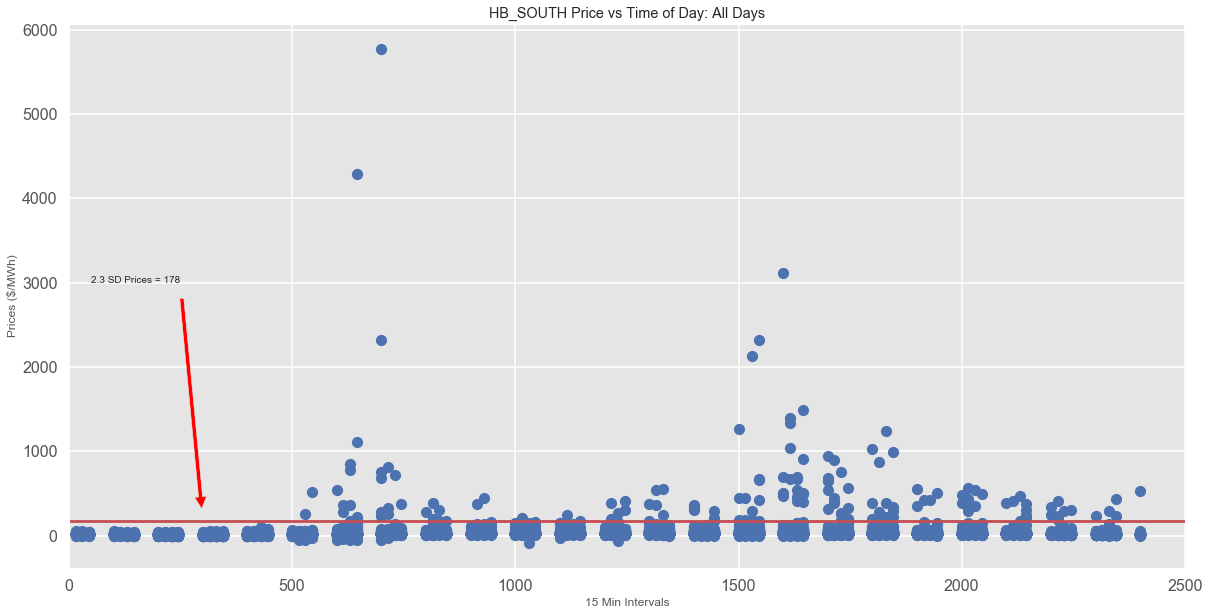

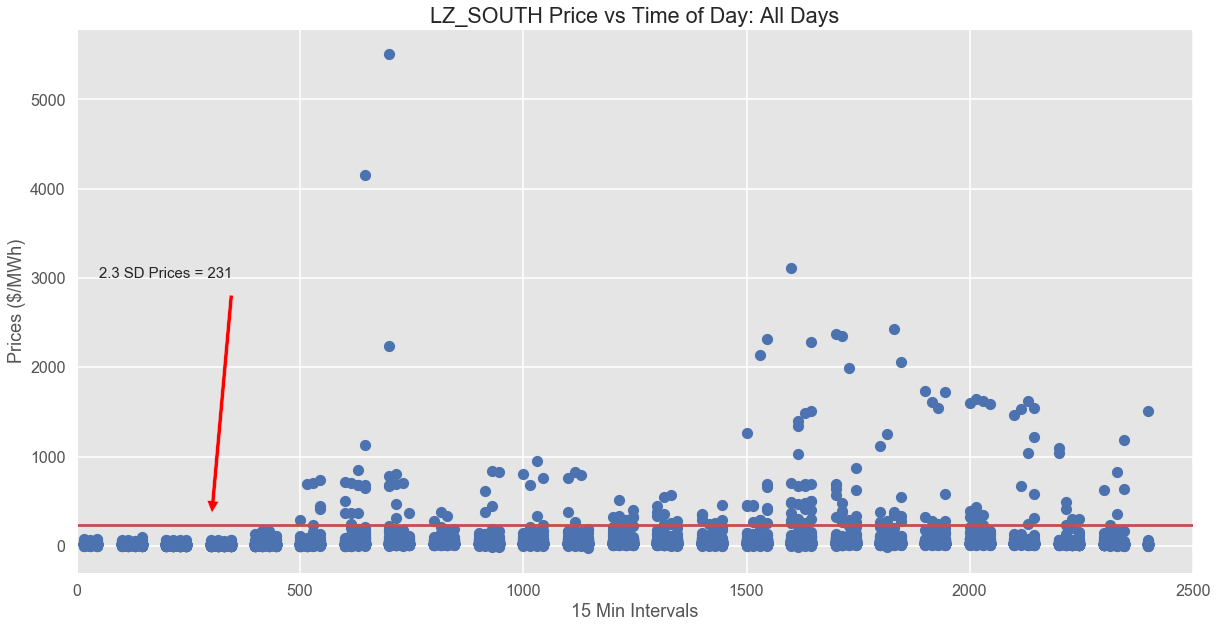

In [104]:
### HB_SOUTH Price vs Time of Day: All Days
plt.title('HB_SOUTH Price vs Time of Day: All Days')
plt.xlabel('15 Min Intervals')
plt.ylabel('Prices ($/MWh)')
plt.grid(True)
Xaxis = dfMASTER['Interval Ending']
plt.plot(Xaxis,dfMASTER['HB_SOUTH'], 'bo')
ax = plt.gca()
ax.set_xlim([0,2500])

# Add line that indicates outliers
plt.plot([0, 2500], [outlier_HB_SOUTH,outlier_HB_SOUTH], 'r-') # ([X axis], [Y axis], line type)

# Add arrow
#subplot_1 = plt.figure().add_subplot(1, 1, 1)
printString = "{} SD Prices = {}".format(sdtMultiplier, int(outlier_HB_SOUTH))
#plt.text (700, 5000, printString, family='monospace', fontsize=11, color='red')
plt.annotate(printString, xy=(300, outlier_HB_SOUTH), xytext=(50, 3000),
            arrowprops=dict(facecolor='red', shrink=0.05))

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
matplotlib.rc('font', size=15)

plt.show()

################################################################################################

### LZ_SOUTH Price vs Time of Day: All Days
plt.title('LZ_SOUTH Price vs Time of Day: All Days')
plt.xlabel('15 Min Intervals')
plt.ylabel('Prices ($/MWh)')
plt.grid(True)
Xaxis = dfMASTER['Interval Ending']
plt.plot(Xaxis,dfMASTER['LZ_SOUTH'], 'bo')
ax = plt.gca()
ax.set_xlim([0,2500])

# Add line that indicates outliers
plt.plot([0, 2500], [outlier_LZ_SOUTH,outlier_LZ_SOUTH], 'r-') # ([X axis], [Y axis], line type)

# Add arrow
printString = "{} SD Prices = {}".format(sdtMultiplier, int(outlier_LZ_SOUTH))
plt.annotate(printString, xy=(300, outlier_LZ_SOUTH), xytext=(50, 3000),
            arrowprops=dict(facecolor='red', shrink=0.05))

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
matplotlib.rc('font', size=15)

plt.show()

### Plot Outliers

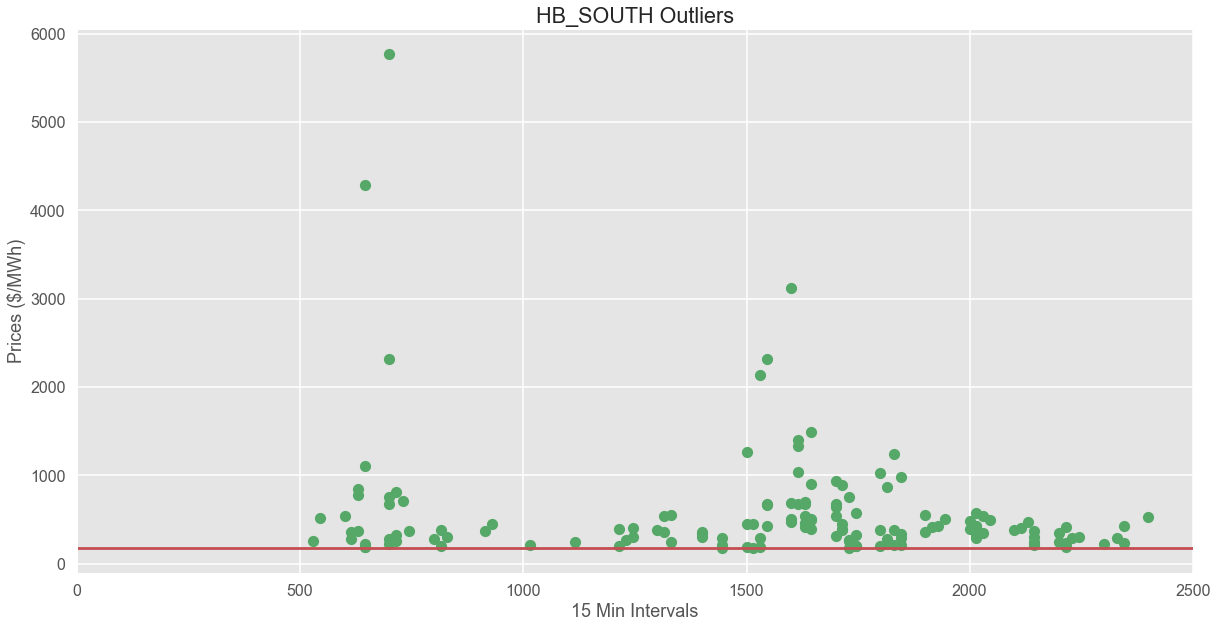

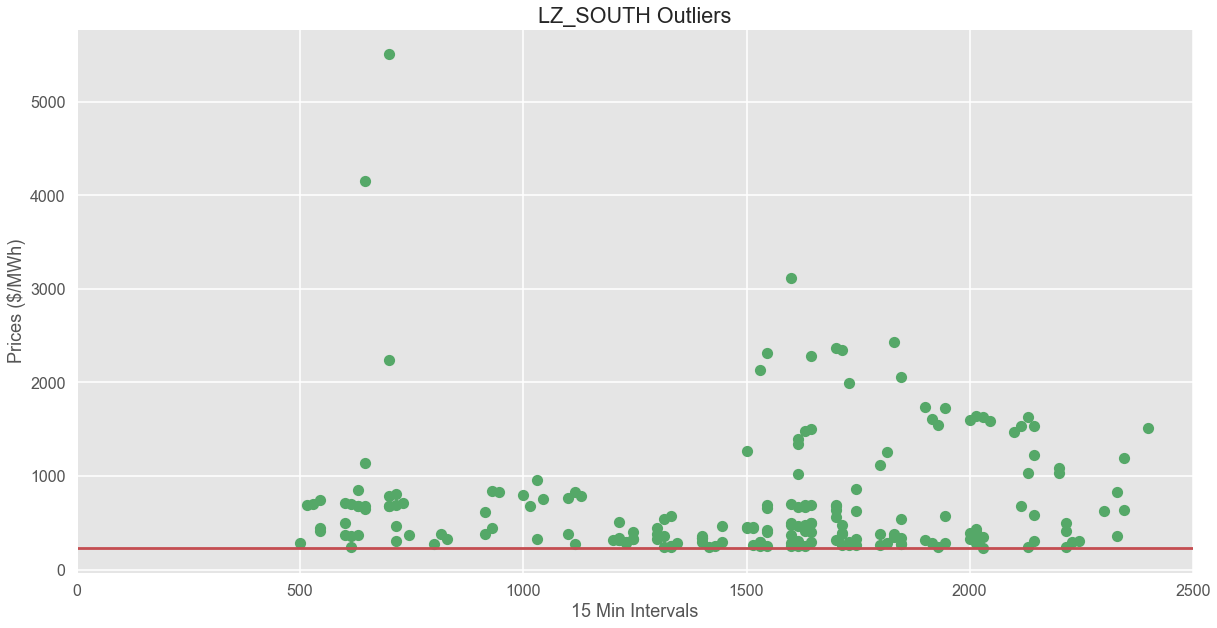

In [105]:
### HB_SOUTH Outliers
plt.title('HB_SOUTH Outliers')
plt.xlabel('15 Min Intervals')
plt.ylabel('Prices ($/MWh)')
plt.grid(True)
Xaxis = dfMASTER_HB_SOUTH['Interval Ending']
plt.plot(Xaxis,dfMASTER_HB_SOUTH['Prices'], 'go')
ax = plt.gca()
ax.set_xlim([0,2500])

# Add line that indicates outliers
plt.plot([0, 2500], [outlier_HB_SOUTH,outlier_HB_SOUTH], 'r-') # ([X axis], [Y axis], line type)

plt.show()

################################################################################################

### LZ_SOUTH Outliers
plt.title('LZ_SOUTH Outliers')
plt.xlabel('15 Min Intervals')
plt.ylabel('Prices ($/MWh)')
plt.grid(True)
Xaxis = dfMASTER_LZ_SOUTH['Interval Ending']
plt.plot(Xaxis,dfMASTER_LZ_SOUTH['Prices'], 'go')
ax = plt.gca()
ax.set_xlim([0,2500])

# Add line that indicates outliers
plt.plot([0, 2500], [outlier_LZ_SOUTH,outlier_LZ_SOUTH], 'r-') # ([X axis], [Y axis], line type)

plt.show()

### Trending Outlier Plots

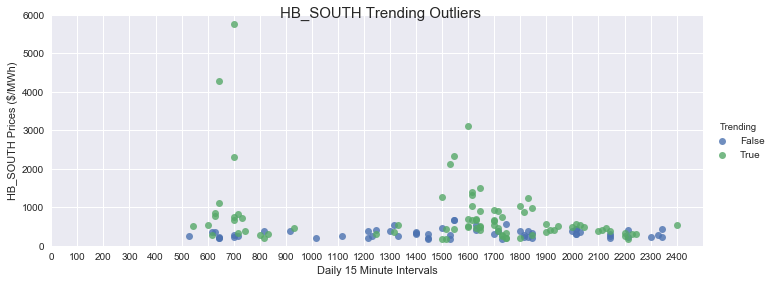

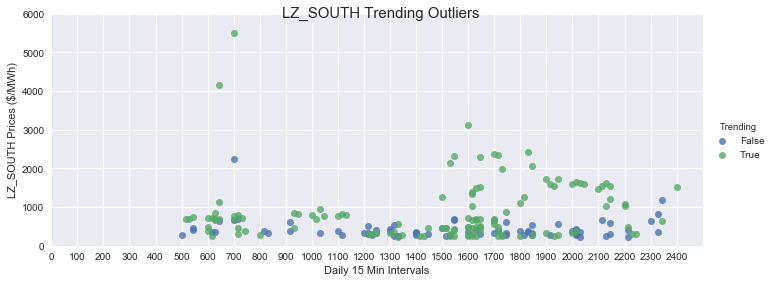

In [106]:
import seaborn as sns; sns.set(color_codes=True)

#plt.figure(figsize=(5,5))

### HB_SOUTH Trending Outliers 
g1 = sns.lmplot( x="Interval Ending", y="Prices", hue="Trending", ci=None, data=dfMASTER_HB_SOUTH, fit_reg=False, size = 4, aspect = 2.5)
g1.fig.suptitle('HB_SOUTH Trending Outliers', fontsize=15)
g1.set_axis_labels('Daily 15 Minute Intervals', 'HB_SOUTH Prices ($/MWh)').set(xlim=(0, 2500), ylim=(0, 6000), xticks=range(0, 2500, 100), yticks=range(0, 7000, 1000))

### LZ_SOUTH Trending Outliers 
g2 = sns.lmplot( x="Interval Ending", y="Prices", hue="Trending", ci=None, data=dfMASTER_LZ_SOUTH, fit_reg=False, size = 4, aspect = 2.5)
g2.fig.suptitle('LZ_SOUTH Trending Outliers', fontsize=15)
g2.set_axis_labels('Daily 15 Min Intervals', 'LZ_SOUTH Prices ($/MWh)').set(xlim=(0, 2500), ylim=(0, 6000), xticks=range(0, 2500, 100), yticks=range(0, 7000, 1000))


### Outliers - By Day of Week

#### HB_SOUTH

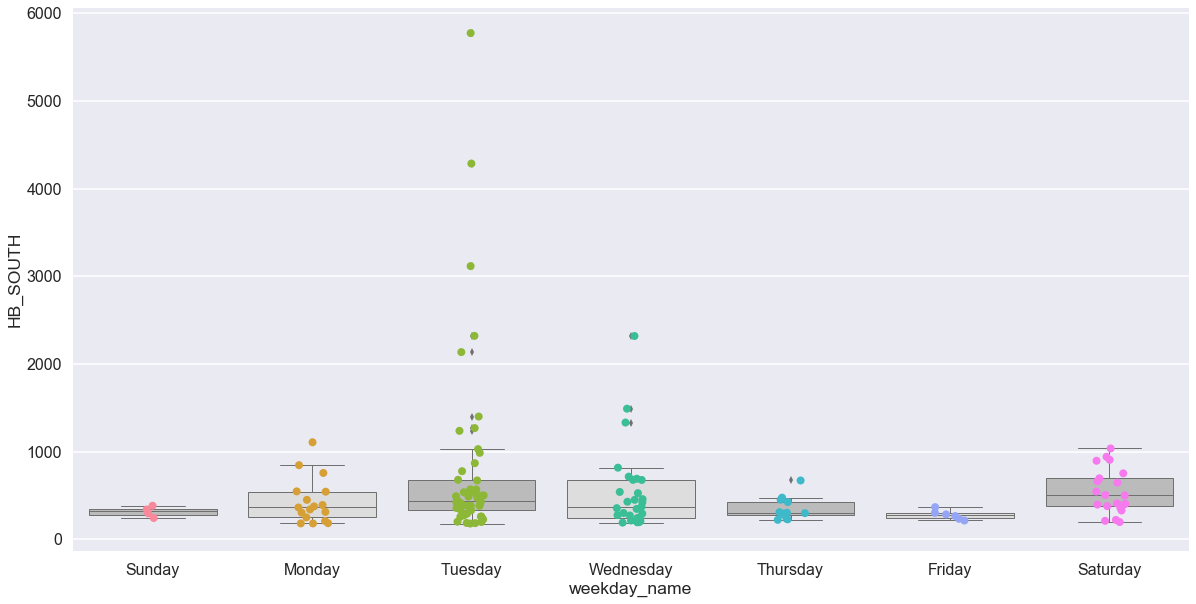

In [107]:
### HB_SOUTH
# Plot Order
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.set_context("poster")
gggg4 = sns.stripplot(x = "weekday_name", y = "HB_SOUTH", data = WeekendDF_HB_SOUTH, jitter = True, order = order, size = 8)
p_box = sns.boxplot(x = "weekday_name", y = "HB_SOUTH", data = WeekendDF_HB_SOUTH, palette=['#BBBBBB','#DDDDDD'],linewidth=1, order = order)


#### LZ_SOUTH

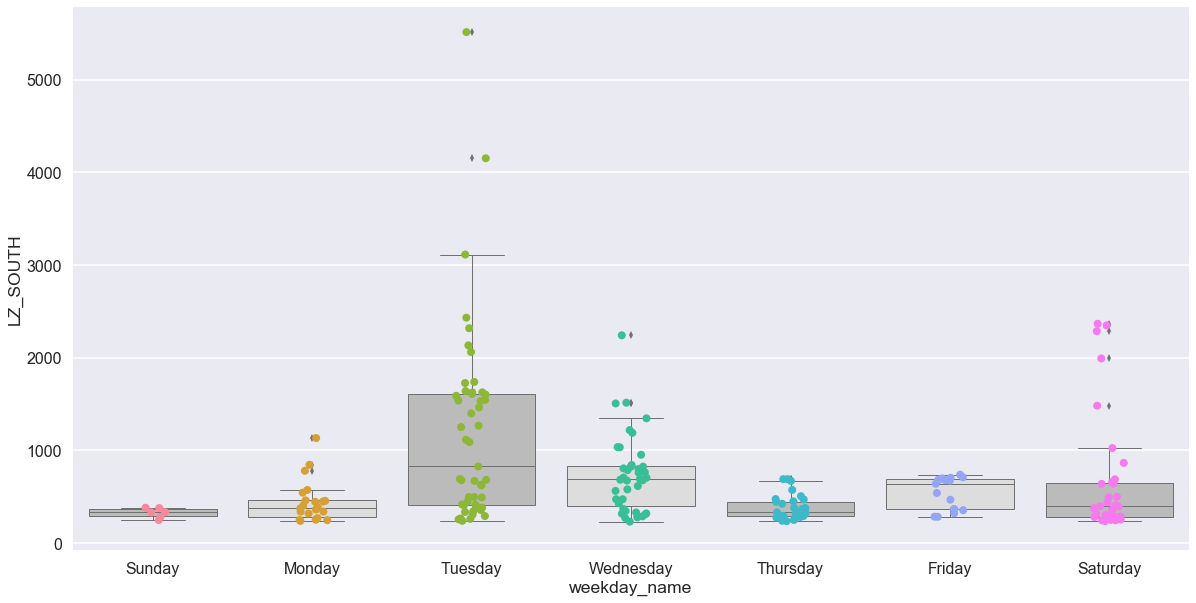

In [108]:
### LZ_SOUTH
# Plot order
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.set_context("poster")
gggg5 = sns.stripplot(x = "weekday_name", y = "LZ_SOUTH", data = WeekendDF_LZ_SOUTH, jitter = True, order = order, size = 8)
p_box = sns.boxplot(x = "weekday_name", y = "LZ_SOUTH", data = WeekendDF_LZ_SOUTH, palette=['#BBBBBB','#DDDDDD'],linewidth=1, order = order)
#plt.text(fontsize = 20, color='Black', fontstyle='italic')


## Ercot Prices vs Natural Gas Prices

##### Need to reconcile Ercot data to have same dimensions as Gas data
- Gas Spot Prices: Daily, skips weekends

- Ercot Prices: 15 Minute Intervals, has weekends

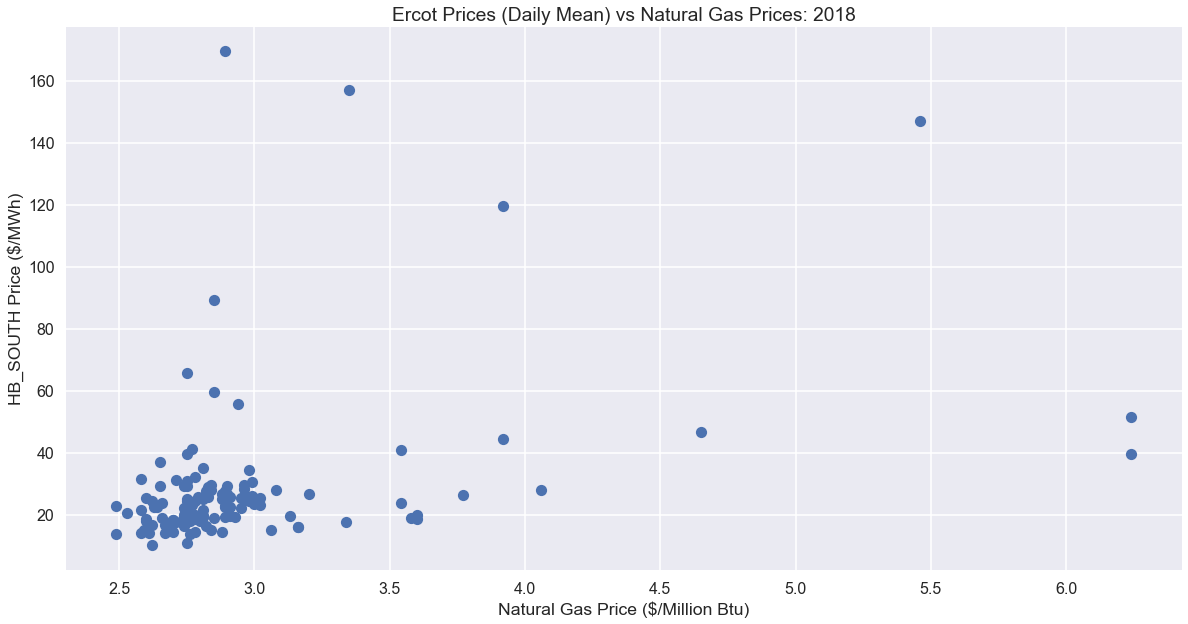

HB_SOUTH r-squared: 0.140809406389





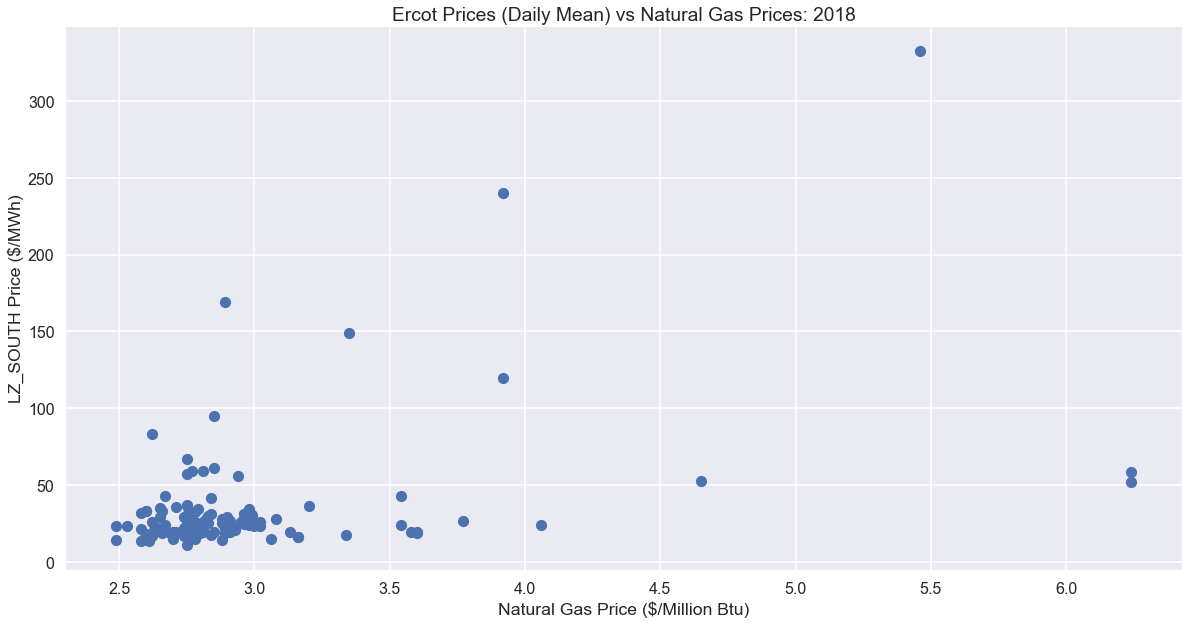

LZ_SOUTH r-squared: 0.205696329571





In [109]:
### Load in Natural Gas Spot Price data 
# read all data from "Master Data" tab in the "Natural Gas Spot Price" 
dfGAS = pd.read_excel(file_path, sheet_name = 'Natural Gas Spot Price')
# Convert df to a Date Frame
dfGAS = pd.DataFrame(dfGAS) 

dfGAS_indexed = dfGAS.set_index('Oper Day')

dfMASTER_indexed = dfMASTER.set_index('Oper Day')
# Convert index to DateTimeIndex
dfMASTER_indexed.index = pd.to_datetime(dfMASTER_indexed.index)
dailyErcotPrices_HB_SOUTH = dfMASTER_indexed['HB_SOUTH'].resample('D').mean()
dailyErcotPrices_LZ_SOUTH = dfMASTER_indexed['LZ_SOUTH'].resample('D').mean()

dailyErcotPrices_HB_SOUTH
dialyGasPrices = dfGAS_indexed['Spot Price ($/Million Btu)']

dfTemp = dailyErcotPrices_HB_SOUTH.to_frame().join(dialyGasPrices.to_frame())

for date in dfTemp.index: # for each date in the data frame
    #print(date)
    if pd.isnull(dfTemp['Spot Price ($/Million Btu)'].loc[date]): # check if the element is NaN
        dfTemp = dfTemp.drop(index = date)

dfTemp = dfTemp.join(dailyErcotPrices_LZ_SOUTH)
dfTemp = dfTemp[['HB_SOUTH', 'LZ_SOUTH', 'Spot Price ($/Million Btu)']] # swap order of columns
#dfTemp # Sanity Check


#############################################################################################
#############################################################################################
#############################################################################################


### Ercot Prices (Daily Mean) vs Natural Gas Prices: 2018
from scipy import stats
plt.title('Ercot Prices (Daily Mean) vs Natural Gas Prices: 2018')
plt.xlabel('Natural Gas Price ($/Million Btu)')
plt.ylabel('HB_SOUTH Price ($/MWh)')
plt.grid(True)

Xaxis = dfTemp['Spot Price ($/Million Btu)']
plt.plot(Xaxis,dfTemp['HB_SOUTH'], 'bo')
ax = plt.gca()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.show()

### Calculate R-Squared
slope, intercept, r_value, p_value, std_err = stats.linregress(dfTemp['Spot Price ($/Million Btu)'],dfTemp['HB_SOUTH'])
print("HB_SOUTH r-squared:", r_value**2)
print('\n\n')

#############################################################################################

### Ercot Prices (Daily Mean) vs Natural Gas Prices: 2018
plt.title('Ercot Prices (Daily Mean) vs Natural Gas Prices: 2018')
plt.xlabel('Natural Gas Price ($/Million Btu)')
plt.ylabel('LZ_SOUTH Price ($/MWh)')
plt.grid(True)

Xaxis = dfTemp['Spot Price ($/Million Btu)']
plt.plot(Xaxis,dfTemp['LZ_SOUTH'], 'bo')
ax = plt.gca()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.show()


### Calculate R-Squared
slope, intercept, r_value, p_value, std_err = stats.linregress(dfTemp['Spot Price ($/Million Btu)'],dfTemp['LZ_SOUTH'])
print("LZ_SOUTH r-squared:", r_value**2)
print('\n\n')


# import seaborn as sns; sns.set(color_codes=True)
# ggg1 = sns.lmplot( x="Spot Price ($/Million Btu)", y="HB_SOUTH", ci=None, data=dfTemp, fit_reg=True, size = 4).fig.suptitle('HB_SOUTH - Ercot Prices (Daily Mean) vs Natural Gas Prices: 2018', fontsize=15)
# ggg2 = sns.lmplot( x="Spot Price ($/Million Btu)", y="LZ_SOUTH", ci=None, data=dfTemp, fit_reg=True, size = 4).fig.suptitle('LZ_SOUTH - Ercot Prices (Daily Mean) vs Natural Gas Prices: 2018', fontsize=15)
